 <img src="full_cHiX0QZE-1024x524.jpg" style = 'width:200px;height:100px'/>

### Анализ ассортимента магазина на примере данных из магазина"Спортмастер"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re #для нахлдждения вида товара


%matplotlib inline 

In [5]:
dt = pd.read_csv('sportmasterall.csv', encoding='windows-1251', sep=';')

In [6]:
dt

,Код товара,Название,Цена,Старая цена,Наличие,Ссылка на товар,Дата обновления,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,10000466,Солнцезащитные очки Leto,717,1025,В наличии,https://www.sportmaster.ru/product/10000466/,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
1,10000468,Солнцезащитные очки Leto,707,1011,В наличии,https://www.sportmaster.ru/product/10000468/,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
2,10000518,Шапочка для плавания Speedo,926,0,В наличии,https://www.sportmaster.ru/product/10000518/,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
3,10000520,Шапочка для плавания Speedo Pace,1013,0,В наличии,https://www.sportmaster.ru/product/10000520/,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
4,10001997,Ласты для плавания Joss Fins,1322,0,В наличии,https://www.sportmaster.ru/product/10001997/?i...,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15925,1852160,Маска для плавания Joss,1212,0,В наличии,https://www.sportmaster.ru/product/1852160/?ic...,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
15926,1852162,Маска для плавания Joss,1200,0,В наличии,https://www.sportmaster.ru/product/1852162/?ic...,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
15927,1852427,Перчатки вратарские Puma evoPower,762,1526,В наличии,https://www.sportmaster.ru/product/1852427/?ic...,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN
15928,1852633,Полуботинки мужские Columbia Cayman 4 Slip,3931,5616,В наличии,https://www.sportmaster.ru/product/1852633/,19.12.2019 1:12,NaN,NaN,NaN,NaN,NaN


#### Приводим данные в порядок. Убираем неинформативные столбцы:

In [7]:
dt = dt.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'  ], axis =1) 

In [8]:
dt

,Код товара,Название,Цена,Старая цена,Наличие,Ссылка на товар,Дата обновления
0,10000466,Солнцезащитные очки Leto,717,1025,В наличии,https://www.sportmaster.ru/product/10000466/,19.12.2019 1:12
1,10000468,Солнцезащитные очки Leto,707,1011,В наличии,https://www.sportmaster.ru/product/10000468/,19.12.2019 1:12
2,10000518,Шапочка для плавания Speedo,926,0,В наличии,https://www.sportmaster.ru/product/10000518/,19.12.2019 1:12
3,10000520,Шапочка для плавания Speedo Pace,1013,0,В наличии,https://www.sportmaster.ru/product/10000520/,19.12.2019 1:12
4,10001997,Ласты для плавания Joss Fins,1322,0,В наличии,https://www.sportmaster.ru/product/10001997/?i...,19.12.2019 1:12
...,...,...,...,...,...,...,...
15925,1852160,Маска для плавания Joss,1212,0,В наличии,https://www.sportmaster.ru/product/1852160/?ic...,19.12.2019 1:12
15926,1852162,Маска для плавания Joss,1200,0,В наличии,https://www.sportmaster.ru/product/1852162/?ic...,19.12.2019 1:12
15927,1852427,Перчатки вратарские Puma evoPower,762,1526,В наличии,https://www.sportmaster.ru/product/1852427/?ic...,19.12.2019 1:12
15928,1852633,Полуботинки мужские Columbia Cayman 4 Slip,3931,5616,В наличии,https://www.sportmaster.ru/product/1852633/,19.12.2019 1:12


#### Переводим название столбцов на англ. яз для удобcтва в обращении

In [9]:
dt = dt.rename(columns = {'Код товара' : 'code',
                         'Название' : 'name',
                         'Цена' : 'price',
                         'Старая цена' : 'old_price',
                         'Наличие' : 'Availability',
                         'Ссылка на товар' : 'link',
                         'Дата обновления' : 'data upgrade',})

In [10]:
dt

,code,name,price,old_price,Availability,link,data upgrade
0,10000466,Солнцезащитные очки Leto,717,1025,В наличии,https://www.sportmaster.ru/product/10000466/,19.12.2019 1:12
1,10000468,Солнцезащитные очки Leto,707,1011,В наличии,https://www.sportmaster.ru/product/10000468/,19.12.2019 1:12
2,10000518,Шапочка для плавания Speedo,926,0,В наличии,https://www.sportmaster.ru/product/10000518/,19.12.2019 1:12
3,10000520,Шапочка для плавания Speedo Pace,1013,0,В наличии,https://www.sportmaster.ru/product/10000520/,19.12.2019 1:12
4,10001997,Ласты для плавания Joss Fins,1322,0,В наличии,https://www.sportmaster.ru/product/10001997/?i...,19.12.2019 1:12
...,...,...,...,...,...,...,...
15925,1852160,Маска для плавания Joss,1212,0,В наличии,https://www.sportmaster.ru/product/1852160/?ic...,19.12.2019 1:12
15926,1852162,Маска для плавания Joss,1200,0,В наличии,https://www.sportmaster.ru/product/1852162/?ic...,19.12.2019 1:12
15927,1852427,Перчатки вратарские Puma evoPower,762,1526,В наличии,https://www.sportmaster.ru/product/1852427/?ic...,19.12.2019 1:12
15928,1852633,Полуботинки мужские Columbia Cayman 4 Slip,3931,5616,В наличии,https://www.sportmaster.ru/product/1852633/,19.12.2019 1:12


#### Определим количество товаров

In [11]:
dt['name'].value_counts()

Футболка мужская Demix                                      149
Шапочка для плавания Joss                                    89
Брюки мужские Demix                                          76
Очки для плавания Joss                                       75
Легинсы женские Demix                                        68
                                                           ... 
Джемпер женский The North Face Impendor Light Midlayer        1
Толстовка женская The North Face Impendor Light Midlayer      1
Футболка без рукавов женская The North Face Inlux             1
Спальный мешок JACK WOLFSKIN SMOOZIP +7                       1
Полуботинки мужские Columbia Cayman 4 Slip                    1
Name: name, Length: 8696, dtype: int64

In [12]:
name_and_amount = dt['name'].value_counts()

In [13]:
name_and_amount.reset_index()

,index,name
0,Футболка мужская Demix,149
1,Шапочка для плавания Joss,89
2,Брюки мужские Demix,76
3,Очки для плавания Joss,75
4,Легинсы женские Demix,68
...,...,...
8691,Джемпер женский The North Face Impendor Light ...,1
8692,Толстовка женская The North Face Impendor Ligh...,1
8693,Футболка без рукавов женская The North Face Inlux,1
8694,Спальный мешок JACK WOLFSKIN SMOOZIP +7,1


Приведем в порядок названия столбцов:

In [14]:
name_and_amount = name_and_amount.reset_index().rename(columns={'index' : 'name',
                                             'name' : 'amount'})

In [15]:
name_and_amount

,name,amount
0,Футболка мужская Demix,149
1,Шапочка для плавания Joss,89
2,Брюки мужские Demix,76
3,Очки для плавания Joss,75
4,Легинсы женские Demix,68
...,...,...
8691,Джемпер женский The North Face Impendor Light ...,1
8692,Толстовка женская The North Face Impendor Ligh...,1
8693,Футболка без рукавов женская The North Face Inlux,1
8694,Спальный мешок JACK WOLFSKIN SMOOZIP +7,1


Так как мы имеем слишком много позиций, для анализа оставим только те товары количество которых превышает 30 шт.:

In [16]:
name_and_amount_over_30 = name_and_amount.query("amount> 30")

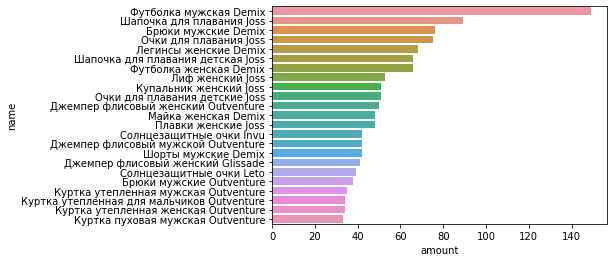

In [17]:
sns.barplot(x = 'amount', y = 'name' , data = name_and_amount_over_30)
plt.xticks(rotation=0)
plt.show()

Можем сделать вывод, что кодичество мужских футболок Demix намного 
вревосходит количество любых других продуктов магазина.




Определим количество наиболее часто встречающихся вещей без привязки к полу и бренду:

Создадим колонку с типами товаров:

In [18]:
s2 = dt.name.apply(lambda x: x.split(' ')[0])

In [19]:
dt['product'] = s2

In [20]:
dt

,code,name,price,old_price,Availability,link,data upgrade,product
0,10000466,Солнцезащитные очки Leto,717,1025,В наличии,https://www.sportmaster.ru/product/10000466/,19.12.2019 1:12,Солнцезащитные
1,10000468,Солнцезащитные очки Leto,707,1011,В наличии,https://www.sportmaster.ru/product/10000468/,19.12.2019 1:12,Солнцезащитные
2,10000518,Шапочка для плавания Speedo,926,0,В наличии,https://www.sportmaster.ru/product/10000518/,19.12.2019 1:12,Шапочка
3,10000520,Шапочка для плавания Speedo Pace,1013,0,В наличии,https://www.sportmaster.ru/product/10000520/,19.12.2019 1:12,Шапочка
4,10001997,Ласты для плавания Joss Fins,1322,0,В наличии,https://www.sportmaster.ru/product/10001997/?i...,19.12.2019 1:12,Ласты
...,...,...,...,...,...,...,...,...
15925,1852160,Маска для плавания Joss,1212,0,В наличии,https://www.sportmaster.ru/product/1852160/?ic...,19.12.2019 1:12,Маска
15926,1852162,Маска для плавания Joss,1200,0,В наличии,https://www.sportmaster.ru/product/1852162/?ic...,19.12.2019 1:12,Маска
15927,1852427,Перчатки вратарские Puma evoPower,762,1526,В наличии,https://www.sportmaster.ru/product/1852427/?ic...,19.12.2019 1:12,Перчатки
15928,1852633,Полуботинки мужские Columbia Cayman 4 Slip,3931,5616,В наличии,https://www.sportmaster.ru/product/1852633/,19.12.2019 1:12,Полуботинки


У нас появилась новая колонка со значением типа товара.
Определим каких типов товаров больше:

In [21]:
name_and_amount_type = dt['product'].value_counts()

In [22]:
name_and_amount_type

Куртка       1387
Кроссовки    1265
Брюки        1043
Футболка      840
Ботинки       763
             ... 
Козырек         1
Барьер          1
Лестница        1
Манжеты         1
Консоль         1
Name: product, Length: 418, dtype: int64

In [23]:
name_and_amount_type = name_and_amount_type.reset_index().rename(columns={'index' : 'type',
                                             'product' : 'amount'})

In [24]:
name_and_amount_type

,type,amount
0,Куртка,1387
1,Кроссовки,1265
2,Брюки,1043
3,Футболка,840
4,Ботинки,763
...,...,...
413,Козырек,1
414,Барьер,1
415,Лестница,1
416,Манжеты,1


Выберим тип товара, количество которого превышает 50 шт.:

In [25]:
name_and_amount_type_50 = name_and_amount_type.query("amount> 50")

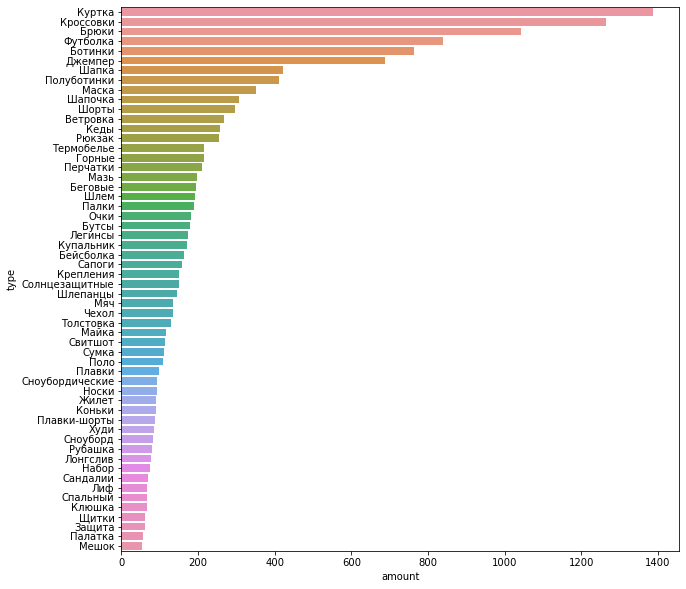

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'amount', y = 'type' , data = name_and_amount_type_50)
plt.xticks(rotation=0)
plt.show()


По графику можно сделать вывод, что наиболее часто встречающиеся типы товаров в магазине "Спортмастер"это:


    1. Куртки;
    2. Кроссовки;
    3. Брюки;
    4. Футболки;
    5. Ботинки;
    6. Джемпера.

#### Какие товары больше всего подешевели и на сколько

Определим какие товары проходили уценку

In [27]:
sale = dt.query(("old_price > 0 & price != old_price"))[['name','price','old_price']]

In [28]:
sale

,name,price,old_price
0,Солнцезащитные очки Leto,717,1025
1,Солнцезащитные очки Leto,707,1011
13,"Фрисби Torneo с отверстием, 29 см",71,102
14,Треккинговые палки Masters Sherpa,5339,6674
15,Брюки женские Columbia Kenzie Cove,1023,2047
...,...,...,...
15919,Очки для плавания Joss,402,805
15923,Шапочка для плавания Speedo Monogram End+,406,813
15924,Обруч массажный Torneo Magic Bio,765,1532
15927,Перчатки вратарские Puma evoPower,762,1526


In [29]:
sale['discount'] = sale['old_price'] - sale['price']

In [30]:
sale

,name,price,old_price,discount
0,Солнцезащитные очки Leto,717,1025,308
1,Солнцезащитные очки Leto,707,1011,304
13,"Фрисби Torneo с отверстием, 29 см",71,102,31
14,Треккинговые палки Masters Sherpa,5339,6674,1335
15,Брюки женские Columbia Kenzie Cove,1023,2047,1024
...,...,...,...,...
15919,Очки для плавания Joss,402,805,403
15923,Шапочка для плавания Speedo Monogram End+,406,813,407
15924,Обруч массажный Torneo Magic Bio,765,1532,767
15927,Перчатки вратарские Puma evoPower,762,1526,764


In [31]:

sale_group = sale.groupby('name').agg({'discount':'mean'}).reset_index()


In [32]:
sale_group

,name,discount
0,Cвитшот мужской Adidas Motion Pack Crew,1648.0
1,Аккумулятор Outventure,1486.0
2,Аккумулятор Outventure 2600 mAh,625.0
3,Аккумулятор Outventure 3000 mAh,635.0
4,Багажный ремень Outventure,211.5
...,...,...
4483,Юбка-шорты женская Columbia Anytime Casual,1533.0
4484,Юбка-шорты женская Columbia Anytime Casual Skort,919.0
4485,Юбка-шорты женская JACK WOLFSKIN Desert,1205.0
4486,Юбка-шорты женская Outventure,1029.0


In [33]:
sale_group.sort_values(['discount'], ascending = False)

,name,discount
898,Велоэргометр Kettler Racer S-Fit APP,54120.0
2344,Куртка пуховая женская Sportalm Corbier,48498.0
2347,Куртка пуховая женская Sportalm Kyla RR Exclusive,42230.0
2551,Куртка утепленная женская Sportalm Maelys,41915.0
2348,Куртка пуховая женская Sportalm Kyla RR Neon,41369.0
...,...,...
3730,Стакан Outventure,51.0
3857,Фрисби Torneo Flying Sun,40.0
3859,"Фрисби Torneo, 23 см",39.5
3858,"Фрисби Torneo с отверстием, 29 см",31.0


Таким образом мы определили товары, которые больше всего уценились в денежном эквиваленте.

 Но что насчет процентного соотношения первоначальной цены товара и его уценки?

In [34]:
sale_group_proc = sale.groupby('name').agg({'discount':'mean','old_price':'mean'}).reset_index()

In [35]:
sale_group_proc

,name,discount,old_price
0,Cвитшот мужской Adidas Motion Pack Crew,1648.0,4119.0
1,Аккумулятор Outventure,1486.0,3714.0
2,Аккумулятор Outventure 2600 mAh,625.0,1250.0
3,Аккумулятор Outventure 3000 mAh,635.0,1269.0
4,Багажный ремень Outventure,211.5,527.0
...,...,...,...
4483,Юбка-шорты женская Columbia Anytime Casual,1533.0,3065.0
4484,Юбка-шорты женская Columbia Anytime Casual Skort,919.0,3062.0
4485,Юбка-шорты женская JACK WOLFSKIN Desert,1205.0,4015.0
4486,Юбка-шорты женская Outventure,1029.0,2057.0


In [36]:
sale_group_proc['procent_discount'] = (sale_group_proc['discount']*100)/sale_group_proc['old_price']

In [37]:
sale_group_proc.sort_values(['procent_discount'], ascending = False)

,name,discount,old_price,procent_discount
3108,Повязка женская Nike Swoosh Sport,710.0,1013.0,70.088845
3847,Упоры для отжимания Kettler,1751.0,2501.0,70.011995
2946,"Носки мужские Demix, 1 пара",155.0,308.0,50.324675
1140,Дезодорант для обуви Фрешеры теннис,178.5,355.5,50.210970
4166,Шапка Madshus,255.0,508.0,50.196850
...,...,...,...,...
1582,"Котелок Outventure, 4 л",168.0,1122.0,14.973262
2454,Куртка утепленная для мальчиков Glissade,606.0,4241.0,14.289083
33,Беговые лыжи Nordway Classic,204.0,1625.0,12.553846
224,Ботинки для беговых лыж Nordway Narvik,200.0,1801.0,11.104942


Можно сделать вывод, что наибольший процент скидки это 70% на товары:

    1. Повязка женская Nike Swoosh Sport;
    2. Упоры для отжимания Kettler.

#### Частота распределения скидок на товары

Объединим две таблицы (с данными о скидках в рублях и о скидках в процентах) в одну:

In [38]:
sale_group['procent_discount'] = sale_group_proc['procent_discount']

In [39]:
sale_group

,name,discount,procent_discount
0,Cвитшот мужской Adidas Motion Pack Crew,1648.0,40.009711
1,Аккумулятор Outventure,1486.0,40.010770
2,Аккумулятор Outventure 2600 mAh,625.0,50.000000
3,Аккумулятор Outventure 3000 mAh,635.0,50.039401
4,Багажный ремень Outventure,211.5,40.132827
...,...,...,...
4483,Юбка-шорты женская Columbia Anytime Casual,1533.0,50.016313
4484,Юбка-шорты женская Columbia Anytime Casual Skort,919.0,30.013063
4485,Юбка-шорты женская JACK WOLFSKIN Desert,1205.0,30.012453
4486,Юбка-шорты женская Outventure,1029.0,50.024307


In [40]:
sale_group['old_price']=sale_group_proc['old_price']

In [41]:
sale_group

,name,discount,procent_discount,old_price
0,Cвитшот мужской Adidas Motion Pack Crew,1648.0,40.009711,4119.0
1,Аккумулятор Outventure,1486.0,40.010770,3714.0
2,Аккумулятор Outventure 2600 mAh,625.0,50.000000,1250.0
3,Аккумулятор Outventure 3000 mAh,635.0,50.039401,1269.0
4,Багажный ремень Outventure,211.5,40.132827,527.0
...,...,...,...,...
4483,Юбка-шорты женская Columbia Anytime Casual,1533.0,50.016313,3065.0
4484,Юбка-шорты женская Columbia Anytime Casual Skort,919.0,30.013063,3062.0
4485,Юбка-шорты женская JACK WOLFSKIN Desert,1205.0,30.012453,4015.0
4486,Юбка-шорты женская Outventure,1029.0,50.024307,2057.0


Распределение процентной скидки на товары:

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='procent_discount', ylabel='Density'>

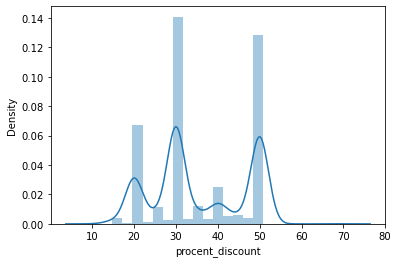

In [42]:
sns.distplot(sale_group.procent_discount)



По графику расспределения скидки(%) можно заметить, что магазин "Спортмастер" чаще всего предоставляет своим покупателям скидку в 30%, чуть реже в 50%. Стоит заметить что больше 50% магазин старается скидки не делать.

Распределение процентной скидки на товар в зависимости от цены:

<AxesSubplot:xlabel='procent_discount', ylabel='old_price'>

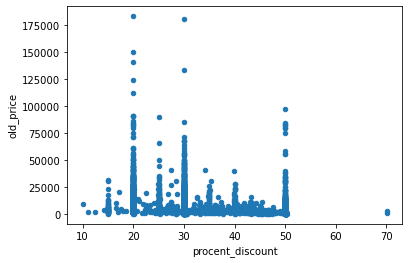

In [43]:
sale_group.plot.scatter(x='procent_discount', y='old_price')

Можно заметить, что на товар выше 100 т.р скидка встречается крайне редко, но а если вам посчатливилось ее найти то она составит 20% или 30%. 

Чаще всего среди уцененных товаров можно встетить товары до 10 т.р. Небольшие скидки магазин тоже старается избегать. Товары со скидкой менее 20% встетить крайне тяжело. 

Но еще тяжелее встетить товары со скидкой 70%. Выбросы на графике - это та самая повязка женская Nike Swoosh Sport и 
упоры для отжимания Kettler, которые мы определили ранее.